<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Practica-06" data-toc-modified-id="Practica-06-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Practica 06</a></span><ul class="toc-item"><li><span><a href="#Exploración-de-Datos-Iniciales" data-toc-modified-id="Exploración-de-Datos-Iniciales-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploración de Datos Iniciales</a></span><ul class="toc-item"><li><span><a href="#housing_median_age" data-toc-modified-id="housing_median_age-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>housing_median_age</a></span></li><li><span><a href="#total_rooms" data-toc-modified-id="total_rooms-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>total_rooms</a></span></li><li><span><a href="#total_bedrooms" data-toc-modified-id="total_bedrooms-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>total_bedrooms</a></span></li><li><span><a href="#population" data-toc-modified-id="population-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>population</a></span></li><li><span><a href="#households" data-toc-modified-id="households-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>households</a></span></li><li><span><a href="#median_income" data-toc-modified-id="median_income-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>median_income</a></span></li><li><span><a href="#median_house_value" data-toc-modified-id="median_house_value-1.1.7"><span class="toc-item-num">1.1.7&nbsp;&nbsp;</span>median_house_value</a></span></li></ul></li><li><span><a href="#Análisis-de-Correlación" data-toc-modified-id="Análisis-de-Correlación-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Análisis de Correlación</a></span></li><li><span><a href="#Predicción-del-Precio-de-Viviendas" data-toc-modified-id="Predicción-del-Precio-de-Viviendas-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Predicción del Precio de Viviendas</a></span></li><li><span><a href="#Reducción-de-Dimensionalidad-con-Análisis-de-Componentes-Principales-(ACP)" data-toc-modified-id="Reducción-de-Dimensionalidad-con-Análisis-de-Componentes-Principales-(ACP)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Reducción de Dimensionalidad con Análisis de Componentes Principales (ACP)</a></span></li><li><span><a href="#Predicción-con-Datos-Reducidos" data-toc-modified-id="Predicción-con-Datos-Reducidos-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Predicción con Datos Reducidos</a></span></li><li><span><a href="#Comparación-de-Modelos" data-toc-modified-id="Comparación-de-Modelos-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Comparación de Modelos</a></span></li><li><span><a href="#Presentación-de-Resultados" data-toc-modified-id="Presentación-de-Resultados-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Presentación de Resultados</a></span></li></ul></li></ul></div>

## Practica 06

Utiliza el conjunto de datos de Kaggle "California Housing Prices", que sirve para problemas de predicción de precios de viviendas. Puedes encontrar este conjunto de datos en: https://www.kaggle.com/camnugent/california-housing-prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
import dtale.app as dtale_app
from ydata_profiling import ProfileReport

/Users/medina/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning:

numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.

/Users/medina/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.



In [2]:
df = pd.read_csv('./housing.csv')

In [3]:
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

### Exploración de Datos Iniciales

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
print(df.isna().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [6]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [8]:
dtale.show(df)

In [9]:
columna_especifica = "total_bedrooms"
df = df.dropna(subset=[columna_especifica]).reset_index(drop=True)

In [10]:
print(df.isna().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [11]:
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20428    -121.09     39.48                25.0       1665.0           374.0   
20429    -121.21     39.49                18.0        697.0           150.0   
20430    -121.22     39.43                17.0       2254.0           485.0   
20431    -121.32     39.43                18.0       1860.0           409.0   
20432    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

#### housing_median_age

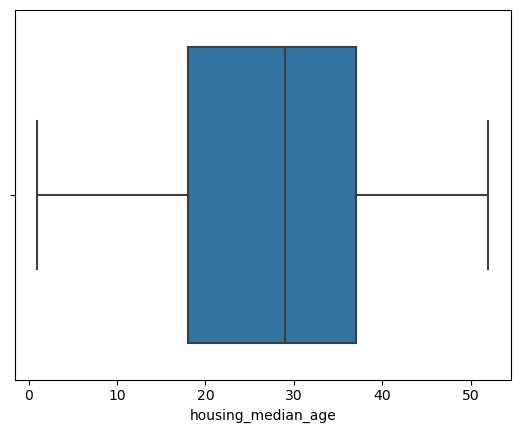

In [12]:
sns.boxplot(x=df['housing_median_age'])
plt.show()

In [13]:
q1 = df['housing_median_age'].quantile(0.25)
q3 = df['housing_median_age'].quantile(0.75)
IQR = q3-q1

u_s = q3+1.5*IQR
u_i = q1-1.5*IQR

In [14]:
valores_atipicos=df[(df['housing_median_age']>u_s)|(df['housing_median_age']<u_i)]
print(valores_atipicos)

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


In [15]:
cantidad_atipicos = len(valores_atipicos)
print(f'Numeros de valores atipicos: {cantidad_atipicos}')

Numeros de valores atipicos: 0


#### total_rooms

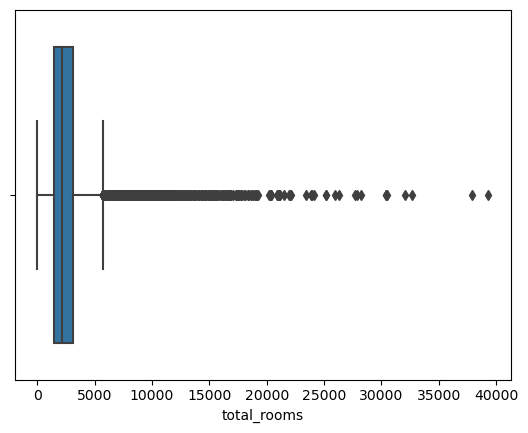

In [16]:
sns.boxplot(x=df['total_rooms'])
plt.show()

In [17]:
q1 = df['total_rooms'].quantile(0.25)
q3 = df['total_rooms'].quantile(0.75)
IQR = q3-q1

u_s = q3+1.5*IQR
u_i = q1-1.5*IQR

In [18]:
valores_atipicos=df[(df['total_rooms']>u_s)|(df['total_rooms']<u_i)]
print(valores_atipicos)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.22     37.86                21.0       7099.0          1106.0   
101      -122.25     37.81                28.0       5806.0          1603.0   
104      -122.26     37.81                34.0       5871.0          1914.0   
185      -122.23     37.79                43.0       5963.0          1344.0   
283      -122.16     37.79                22.0      12842.0          2048.0   
...          ...       ...                 ...          ...             ...   
20336    -121.74     38.55                33.0       6861.0          1820.0   
20337    -121.76     38.55                23.0       8800.0          1857.0   
20356    -121.75     38.67                 9.0      12139.0          2640.0   
20360    -121.79     38.66                15.0       6809.0          1052.0   
20422    -121.39     39.12                28.0      10035.0          1856.0   

       population  households  median_income  media

In [19]:
cantidad_atipicos = len(valores_atipicos)
print(f'Numeros de valores atipicos: {cantidad_atipicos}')

Numeros de valores atipicos: 1290


In [20]:
df = df.drop(valores_atipicos.index).reset_index(drop=True)
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.24     37.85                52.0       1467.0           190.0   
2        -122.25     37.85                52.0       1274.0           235.0   
3        -122.25     37.85                52.0       1627.0           280.0   
4        -122.25     37.85                52.0        919.0           213.0   
...          ...       ...                 ...          ...             ...   
19138    -121.09     39.48                25.0       1665.0           374.0   
19139    -121.21     39.49                18.0        697.0           150.0   
19140    -121.22     39.43                17.0       2254.0           485.0   
19141    -121.32     39.43                18.0       1860.0           409.0   
19142    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

#### total_bedrooms

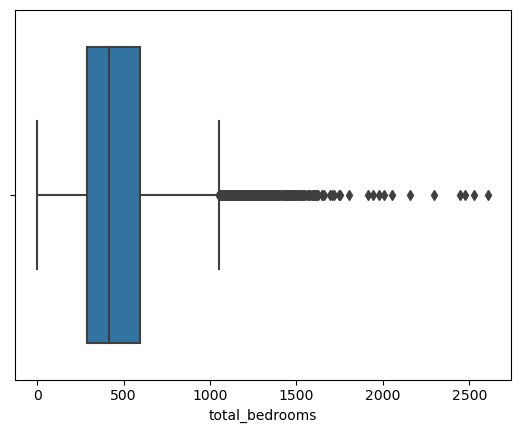

In [21]:
sns.boxplot(x=df['total_bedrooms'])
plt.show()

In [22]:
q1 = df['total_bedrooms'].quantile(0.25)
q3 = df['total_bedrooms'].quantile(0.75)
IQR = q3-q1

u_s = q3+1.5*IQR
u_i = q1-1.5*IQR

In [23]:
valores_atipicos=df[(df['total_bedrooms']>u_s)|(df['total_bedrooms']<u_i)]
print(valores_atipicos)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
94       -122.26     37.80                36.0       5329.0          2477.0   
95       -122.26     37.82                31.0       4596.0          1331.0   
97       -122.26     37.82                22.0       3682.0          1270.0   
98       -122.26     37.82                37.0       3633.0          1085.0   
99       -122.25     37.81                29.0       4656.0          1414.0   
...          ...       ...                 ...          ...             ...   
18943    -118.87     34.18                21.0       5661.0          1369.0   
19023    -121.53     38.60                25.0       5154.0          1105.0   
19031    -121.54     38.58                30.0       4648.0          1252.0   
19033    -121.53     38.58                33.0       4988.0          1169.0   
19044    -121.74     38.56                18.0       3960.0          1151.0   

       population  households  median_income  media

In [24]:
cantidad_atipicos = len(valores_atipicos)
print(f'Numeros de valores atipicos: {cantidad_atipicos}')

Numeros de valores atipicos: 547


In [25]:
df = df.drop(valores_atipicos.index).reset_index(drop=True)
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.24     37.85                52.0       1467.0           190.0   
2        -122.25     37.85                52.0       1274.0           235.0   
3        -122.25     37.85                52.0       1627.0           280.0   
4        -122.25     37.85                52.0        919.0           213.0   
...          ...       ...                 ...          ...             ...   
18591    -121.09     39.48                25.0       1665.0           374.0   
18592    -121.21     39.49                18.0        697.0           150.0   
18593    -121.22     39.43                17.0       2254.0           485.0   
18594    -121.32     39.43                18.0       1860.0           409.0   
18595    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

#### population

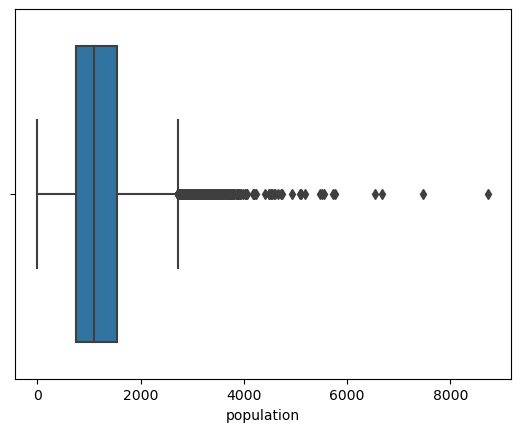

In [26]:
sns.boxplot(x=df['population'])
plt.show()

In [27]:
q1 = df['population'].quantile(0.25)
q3 = df['population'].quantile(0.75)
IQR = q3-q1

u_s = q3+1.5*IQR
u_i = q1-1.5*IQR

In [28]:
valores_atipicos=df[(df['population']>u_s)|(df['population']<u_i)]
print(valores_atipicos)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
190      -122.23     37.78                44.0       2340.0           825.0   
314      -122.18     37.73                42.0       4074.0           874.0   
442      -122.26     37.87                52.0       1087.0           371.0   
515      -122.28     37.79                30.0       4145.0           869.0   
792      -122.06     37.60                17.0       5159.0           832.0   
...          ...       ...                 ...          ...             ...   
18424    -118.90     34.30                13.0       5591.0          1013.0   
18428    -118.88     34.28                22.0       3369.0           771.0   
18494    -121.79     38.54                 7.0       1777.0           513.0   
18526    -121.76     38.66                17.0       5320.0           984.0   
18561    -121.54     39.12                17.0       4251.0           899.0   

       population  households  median_income  media

In [29]:
cantidad_atipicos = len(valores_atipicos)
print(f'Numeros de valores atipicos: {cantidad_atipicos}')

Numeros de valores atipicos: 479


In [30]:
df = df.drop(valores_atipicos.index).reset_index(drop=True)
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.24     37.85                52.0       1467.0           190.0   
2        -122.25     37.85                52.0       1274.0           235.0   
3        -122.25     37.85                52.0       1627.0           280.0   
4        -122.25     37.85                52.0        919.0           213.0   
...          ...       ...                 ...          ...             ...   
18112    -121.09     39.48                25.0       1665.0           374.0   
18113    -121.21     39.49                18.0        697.0           150.0   
18114    -121.22     39.43                17.0       2254.0           485.0   
18115    -121.32     39.43                18.0       1860.0           409.0   
18116    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

#### households

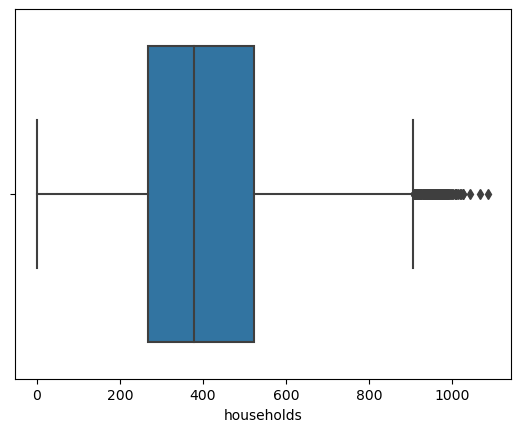

In [31]:
sns.boxplot(x=df['households'])
plt.show()

In [32]:
q1 = df['households'].quantile(0.25)
q3 = df['households'].quantile(0.75)
IQR = q3-q1

u_s = q3+1.5*IQR
u_i = q1-1.5*IQR

In [33]:
valores_atipicos=df[(df['households']>u_s)|(df['households']<u_i)]
print(valores_atipicos)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
113      -122.22     37.85                28.0       5287.0          1048.0   
375      -122.34     37.88                37.0       3061.0           930.0   
440      -122.26     37.87                52.0       2773.0           998.0   
602      -122.15     37.72                29.0       4169.0          1047.0   
617      -122.14     37.71                18.0       3905.0          1007.0   
...          ...       ...                 ...          ...             ...   
17903    -118.92     34.19                16.0       3631.0           974.0   
17938    -118.84     34.21                16.0       4975.0           949.0   
17958    -118.77     34.28                 6.0       4685.0           965.0   
18027    -121.75     38.55                26.0       4802.0           950.0   
18082    -121.54     39.13                18.0       4289.0          1021.0   

       population  households  median_income  media

In [34]:
cantidad_atipicos = len(valores_atipicos)
print(f'Numeros de valores atipicos: {cantidad_atipicos}')

Numeros de valores atipicos: 176


In [35]:
df = df.drop(valores_atipicos.index).reset_index(drop=True)
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.24     37.85                52.0       1467.0           190.0   
2        -122.25     37.85                52.0       1274.0           235.0   
3        -122.25     37.85                52.0       1627.0           280.0   
4        -122.25     37.85                52.0        919.0           213.0   
...          ...       ...                 ...          ...             ...   
17936    -121.09     39.48                25.0       1665.0           374.0   
17937    -121.21     39.49                18.0        697.0           150.0   
17938    -121.22     39.43                17.0       2254.0           485.0   
17939    -121.32     39.43                18.0       1860.0           409.0   
17940    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

#### median_income

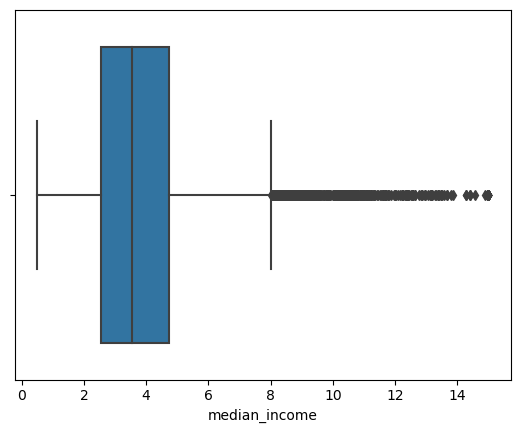

In [36]:
sns.boxplot(x=df['median_income'])
plt.show()

In [37]:
q1 = df['median_income'].quantile(0.25)
q3 = df['median_income'].quantile(0.75)
IQR = q3-q1

u_s = q3+1.5*IQR
u_i = q1-1.5*IQR

In [38]:
valores_atipicos=df[(df['median_income']>u_s)|(df['median_income']<u_i)]
print(valores_atipicos)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
118      -122.19     37.84                18.0       1617.0           210.0   
121      -122.19     37.83                28.0       1326.0           184.0   
122      -122.20     37.83                26.0       1589.0           223.0   
124      -122.19     37.82                32.0       1835.0           264.0   
...          ...       ...                 ...          ...             ...   
17732    -118.90     34.19                26.0       1582.0           196.0   
17761    -118.83     34.17                17.0       4668.0           628.0   
17764    -118.69     34.18                11.0       1177.0           138.0   
17771    -118.69     34.21                10.0       3663.0           409.0   
17825    -118.75     34.33                27.0        534.0            85.0   

       population  households  median_income  media

In [39]:
cantidad_atipicos = len(valores_atipicos)
print(f'Numeros de valores atipicos: {cantidad_atipicos}')

Numeros de valores atipicos: 584


In [40]:
df = df.drop(valores_atipicos.index).reset_index(drop=True)
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.24     37.85                52.0       1467.0           190.0   
1        -122.25     37.85                52.0       1274.0           235.0   
2        -122.25     37.85                52.0       1627.0           280.0   
3        -122.25     37.85                52.0        919.0           213.0   
4        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
17352    -121.09     39.48                25.0       1665.0           374.0   
17353    -121.21     39.49                18.0        697.0           150.0   
17354    -121.22     39.43                17.0       2254.0           485.0   
17355    -121.32     39.43                18.0       1860.0           409.0   
17356    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

#### median_house_value

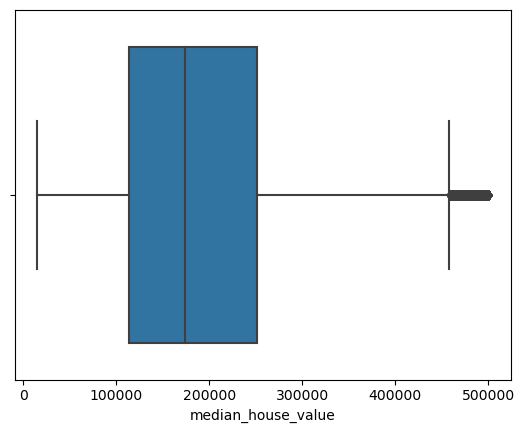

In [41]:
sns.boxplot(x=df['median_house_value'])
plt.show()

In [42]:
q1 = df['median_house_value'].quantile(0.25)
q3 = df['median_house_value'].quantile(0.75)
IQR = q3-q1

u_s = q3+1.5*IQR
u_i = q1-1.5*IQR

In [43]:
valores_atipicos=df[(df['median_house_value']>u_s)|(df['median_house_value']<u_i)]
print(valores_atipicos)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
87       -122.27     37.80                52.0        249.0            78.0   
122      -122.18     37.81                30.0        292.0            38.0   
428      -122.25     37.87                52.0        609.0           236.0   
454      -122.25     37.86                48.0       2153.0           517.0   
458      -122.24     37.86                52.0       1668.0           225.0   
...          ...       ...                 ...          ...             ...   
17106    -119.14     34.23                 8.0        243.0            75.0   
17109    -119.04     34.28                21.0       1856.0           276.0   
17110    -118.96     34.30                16.0       3103.0           482.0   
17181    -118.90     34.14                35.0       1503.0           263.0   
17193    -118.85     34.27                50.0        187.0            33.0   

       population  households  median_income  media

In [44]:
cantidad_atipicos = len(valores_atipicos)
print(f'Numeros de valores atipicos: {cantidad_atipicos}')

Numeros de valores atipicos: 633


In [45]:
df = df.drop(valores_atipicos.index).reset_index(drop=True)
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.24     37.85                52.0       1467.0           190.0   
1        -122.25     37.85                52.0       1274.0           235.0   
2        -122.25     37.85                52.0       1627.0           280.0   
3        -122.25     37.85                52.0        919.0           213.0   
4        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
16719    -121.09     39.48                25.0       1665.0           374.0   
16720    -121.21     39.49                18.0        697.0           150.0   
16721    -121.22     39.43                17.0       2254.0           485.0   
16722    -121.32     39.43                18.0       1860.0           409.0   
16723    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [46]:
mapeo_categorias = {'<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'NEAR BAY': 4, 'ISLAND': 5}

df['ocean_proximity'] = df['ocean_proximity'].replace(mapeo_categorias)

print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.24     37.85                52.0       1467.0           190.0   
1        -122.25     37.85                52.0       1274.0           235.0   
2        -122.25     37.85                52.0       1627.0           280.0   
3        -122.25     37.85                52.0        919.0           213.0   
4        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
16719    -121.09     39.48                25.0       1665.0           374.0   
16720    -121.21     39.49                18.0        697.0           150.0   
16721    -121.22     39.43                17.0       2254.0           485.0   
16722    -121.32     39.43                18.0       1860.0           409.0   
16723    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

### Análisis de Correlación

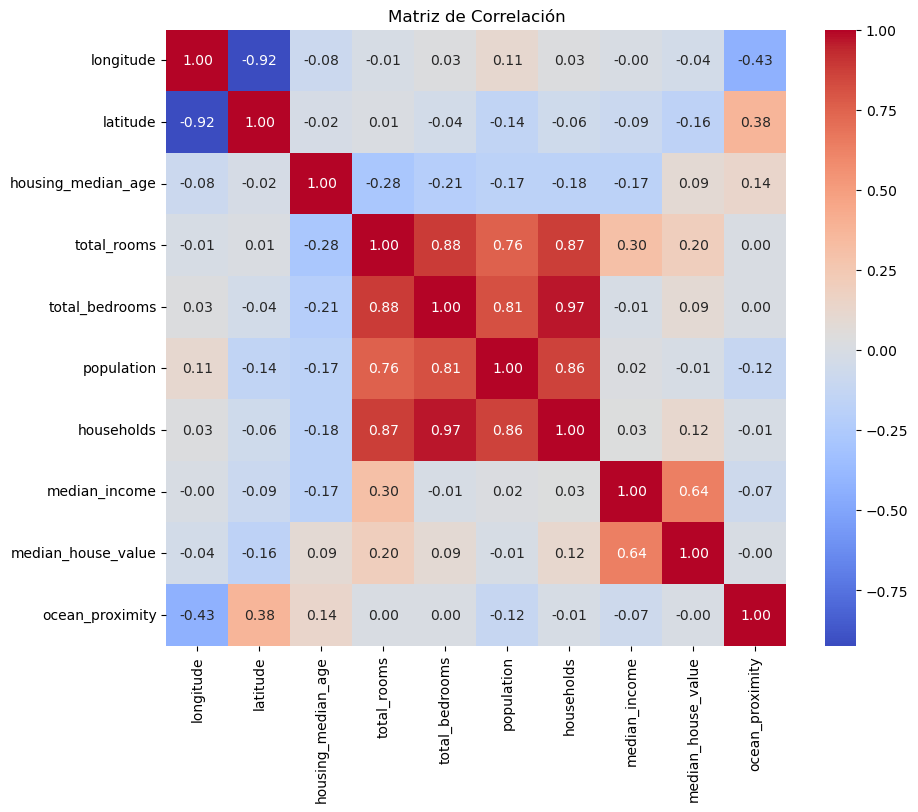

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

### Predicción del Precio de Viviendas

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
model = LinearRegression()

In [63]:
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)

In [65]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [66]:
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R2): {r2}')

Error Cuadrático Medio (MSE): 3325582137.8211656
Coeficiente de Determinación (R2): 0.6112345539037909


### Reducción de Dimensionalidad con Análisis de Componentes Principales (ACP)

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(n_components = 3)

In [81]:
X_train_reduced = pca.fit_transform(X_train)

In [82]:
explained_variance_ratio = pca.explained_variance_ratio_
components = pca.components_

In [83]:
print("Componentes Principales:")
print(components)

Componentes Principales:
[[ 2.60827838e-05 -3.69109668e-05 -2.88303635e-03  8.87671518e-01
   1.59900099e-01  4.05477374e-01  1.48495525e-01  3.12489382e-04
  -1.69063187e-05]
 [-1.15635917e-03  1.57012292e-03 -3.87572180e-03  4.36452690e-01
  -6.58457110e-02 -8.91159675e-01 -1.04813916e-01  1.66137437e-03
   5.32952034e-04]
 [-5.80341044e-04  4.70580546e-05  1.13434925e-02 -1.46601519e-01
   7.53989803e-01 -1.99129950e-01  6.08425259e-01 -6.56278039e-03
   1.11989532e-03]]


In [84]:
print(explained_variance_ratio)

[0.91651137 0.07549707 0.00712788]


### Predicción con Datos Reducidos

In [85]:
model_reduced = LinearRegression()

In [86]:
model_reduced.fit(X_train_reduced, y_train)

LinearRegression()

In [87]:
X_test_reduced = pca.transform(X_test)

In [88]:
y_pred_reduced = model_reduced.predict(X_test_reduced)

In [89]:
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

In [90]:
print(f'MSE del modelo reducido: {mse_reduced}')
print(f'R2 del modelo reducido: {r2_reduced}')

MSE del modelo reducido: 7655974106.252193
R2 del modelo reducido: 0.10500535985311577


### Comparación de Modelos

|  | Regresión lineal | Regresión lineal con PAC |
| ----------- | ----------- | ----------- |
| MSE | 3325582137.8211656 | 7655974106.252193 |
| $R^2$ | 0.6112345539037909 | 0.10500535985311577 |

MSE (Error Cuadrático Medio): Un MSE más bajo indica un mejor rendimiento del modelo en términos de ajuste a los datos. En este caso, el Modelo de Regresión Lineal tiene un MSE significativamente más bajo (aproximadamente la mitad) en comparación con el Modelo de Regresión Lineal con ACP. Esto sugiere que el modelo de regresión lineal original tiene un mejor ajuste numérico a los datos de prueba.

R2 (Coeficiente de Determinación): Un R2 más alto indica un mejor ajuste del modelo a los datos. El Modelo de Regresión Lineal tiene un R2 de 0.611, lo que significa que explica aproximadamente el 61.1% de la variabilidad en los datos. En contraste, el Modelo de Regresión Lineal con ACP tiene un R2 mucho más bajo, solo 0.105, lo que indica que explica solo alrededor del 10.5% de la variabilidad.

> Basándonos en estas métricas, el Modelo de Regresión Lineal parece ser significativamente mejor en términos de ajuste y capacidad para explicar la variabilidad en los datos en comparación con el Modelo de Regresión Lineal con ACP. Por lo tanto, en este contexto, el Modelo de Regresión Lineal es preferible.

### Presentación de Resultados

In [91]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Se puede observar la relación que tienen las variables donde las más relacionadas con el valor de la casa es la proximidad al mar, el ingreso medio y el total de habitaciones, se puede concluir que en este caso es mejor la predicción de regresión lineal sin PCA debido a que al reducir los componentes se pierde significancia debido a que la metrica del coeficiente de determinación es más cercana a cero, de caso contrario con el otro modelo que es más cercano a uno, de igual manera el valor del error cuadrático medio resulta más favorecedor para el modelo de regresión lineal sin PCA donde se tiene un valor más pequeño que por definición ayuda a la reducción de error y a un modelo de predicción más preciso dadas las diferencias entre los valores de entrenamiento y los valores de predicción